<a href="https://colab.research.google.com/github/JSERRANOSAN/Trabajos1/blob/main/A00441176_Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: -Jesús Antonio Serrano Sánchez
*   MATRÍCULA: --00441176

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [69]:
link = 'https://drive.google.com/file/d/10YJ_dzhG9StYD6y7Wz6KVCepXBX-UufC/view?usp=sharing'

df = pd.read_csv('responses.csv')


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [14]:
print(len(df.select_dtypes(include=['int64', 'float64']).columns))
print("columnas numericas")

139
columnas numericas


In [17]:
print(len(df.select_dtypes(include=['object']).columns))
print("columnas de texto")

11
columnas de texto


In [20]:
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.describe())

# Separar columnas de texto
text_cols = df.select_dtypes(include='object')
print(text_cols.describe())

             Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  Classical music      Musical          Pop         Rock  \
count  1005.000000      1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383         2.956132     2.761905     3.471698     3.761952   
std       1.076136         1.252570     1.260845     1.161400     1.184861   
min       1.000000   

In [72]:
print('Número de faltantes por columna: ')
for col in df.columns:
  n_Faltantes= sum(df[col].isna())
  print('{}:{}'.format(col,n_Faltantes))

Número de faltantes por columna: 
Music:3
Slow songs or fast songs:2
Dance:4
Folk:5
Country:5
Classical music:7
Musical:2
Pop:3
Rock:6
Metal or Hardrock:3
Punk:8
Hiphop, Rap:4
Reggae, Ska:7
Swing, Jazz:6
Rock n roll:7
Alternative:7
Latino:8
Techno, Trance:7
Opera:1
Movies:6
Horror:2
Thriller:1
Comedy:3
Romantic:3
Sci-fi:2
War:2
Fantasy/Fairy tales:3
Animated:3
Documentary:8
Western:4
Action:2
History:2
Psychology:5
Politics:1
Mathematics:3
Physics:3
Internet:4
PC:6
Economy Management:5
Biology:6
Chemistry:10
Reading:6
Geography:9
Foreign languages:5
Medicine:5
Law:1
Cars:4
Art exhibitions:6
Religion:3
Countryside, outdoors:7
Dancing:3
Musical instruments:1
Writing:6
Passive sport:15
Active sport:4
Gardening:7
Celebrities:2
Shopping:2
Science and technology:6
Theatre:8
Fun with friends:4
Adrenaline sports:3
Pets:4
Flying:3
Storm:1
Darkness:2
Heights:3
Spiders:5
Snakes:0
Rats:3
Ageing:1
Dangerous dogs:1
Fear of public speaking:1
Smoking:8
Alcohol:5
Healthy eating:3
Daily events:7
Priorit

2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


<Axes: ylabel='Frequency'>

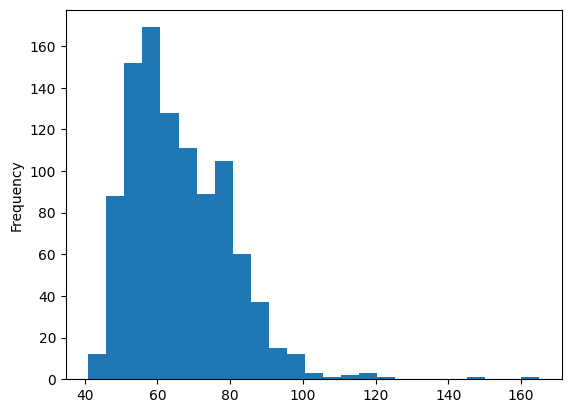

In [28]:
df['Weight'].plot.hist(bins=25)

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [34]:
df['Weight'].skew()

1.2237251927527477

De acuerdo con la teoría, si el coeficiente de skewness es positivo, como ocurre en este caso, tenemos un sesgo a la derecha. (Cfr. Turney, S. (2022). Skewness: Definition, Examples & Formula. https://www.scribbr.com/statistics/skewness/ )

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [75]:
print(df['Weight'].count()," valores faltantes")
print((df['Weight'].count() / df.size) * 100," %")

990  valores faltantes
0.6534653465346535  %


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

TtestResult(statistic=nan, pvalue=nan, df=nan)

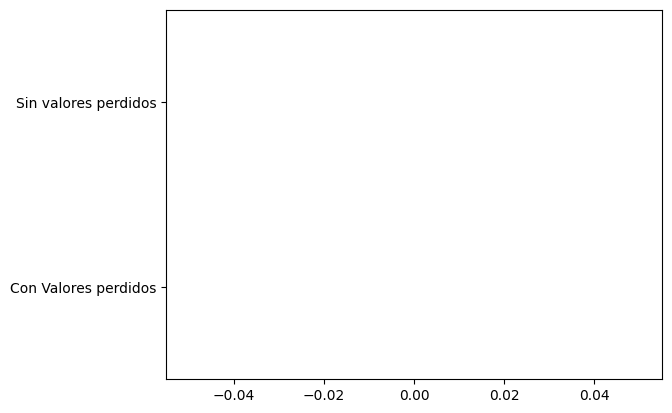

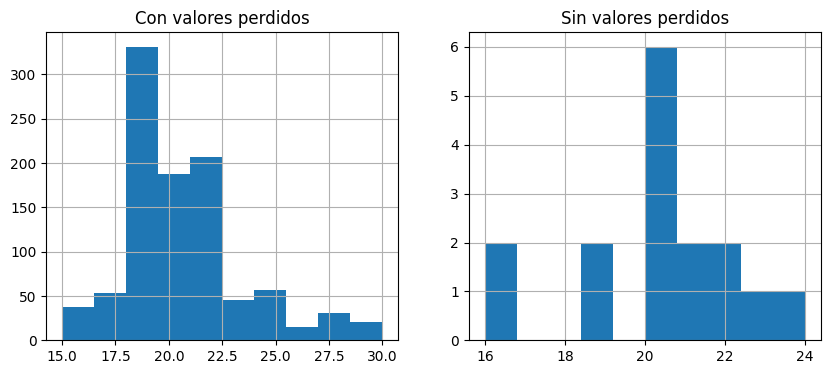

In [81]:
BM_MV = df.Weight.isna()
MV_labels = ['Con Valores perdidos','Sin valores perdidos']
BM_MV


box_sr = pd.Series('',index = BM_MV.unique())
for poss in BM_MV.unique():
    BM = BM_MV == poss
    box_sr[poss] = df[BM].Age

# Age values corresponding to observations with Weight in Weight
box_sr[True]

# Age values corresponding to observations sin Weight in Weightbox_sr[False]
box_sr[False]

# Se hace la gráfica de caja y bigotes, para comparar los dos grupos de observaciones
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

# Se hace gráfica de histograma
BM_MV = df.Weight.isna()
Age_range = (df.Age.min(),df.Age.max())
MV_labels = ['Con valores perdidos','Sin valores perdidos']
plt.figure(figsize=(10,4))
plt.show

for i,poss in enumerate(BM_MV.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV == poss
    df[BM].Age.hist()
    plt.xlim = Age_range
    plt.title(MV_labels[i])




In [88]:

from scipy.stats import ttest_ind
BM_MV = df.Weight.isna()

ttest_ind(df[BM_MV].Age, df[~BM_MV].Age).pvalue

nan

In [98]:
#5b Comparar con Numer of Siblings

BM_MV22 = df.Weight.isna()
MV_labels = ['Con Valores perdidos','Sin valores perdidos']
BM_MV2


box_sr = pd.Series('',index = BM_MV2.unique())
for poss in BM_MV2.unique():
    BM = BM_MV2 == poss
    box_sr[poss] = df[BM].Number of siblings

# Number of siblings values corresponding to observations with Weight in Weight
box_sr[True]

# Number of siblings values corresponding to observations sin Weight in Weightbox_sr[False]
box_sr[False]

# Se hace la gráfica de caja y bigotes, para comparar los dos grupos de observaciones
plt.boxplot(box_sr,vert=False)
plt.yticks([1,2],MV_labels)

# Se hace gráfica de histograma
BM_MV2 = df.Weight.isna()
Number of siblings_range = (df.Number of siblings.min(),df.Number of siblings.max())
MV_labels = ['Con valores perdidos','Sin valores perdidos']
plt.figure(figsize=(10,4))
plt.show

for i,poss in enumerate(BM_MV2.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV2 == poss
    df[BM].Number of siblings.hist()
    plt.xlim = Number of siblings_range
    plt.title(MV_labels[i])

SyntaxError: ignored

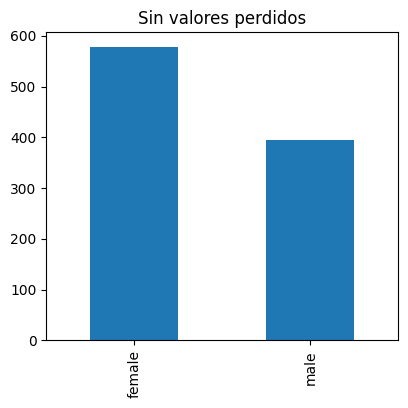

In [114]:
#5b Prueba de independencia para Gender
BM_MV3 = df.Weight.isna()
MV_labels = ['Sin valores perdidos','Con valores perdidos']

plt.figure(figsize=(10,4))
for i,poss in enumerate(BM_MV3.unique()):
    plt.subplot(1,2,i+1)
    BM = BM_MV3 == poss
    df[BM].Gender.value_counts().plot.bar()
    plt.title(MV_labels[i])
plt.show()

In [115]:
from scipy.stats import chi2_contingency
BM_MV4 = df.Weight.isna()
contigency_table = pd.crosstab(BM_MV4,df.Gender)
contigency_table

Gender,female,male
Weight,,
False,578,394


In [89]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [ ]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [90]:
df['Weight'].fillna(df['Weight'].mean(), inplace=True)

Considero que, tratándose de una variable de tipo numérico, es mejor usar Mean. En caso de que fuera categórica, sería la Mode.
Si se usara el método Drop se perdeían muchas observaciones.

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

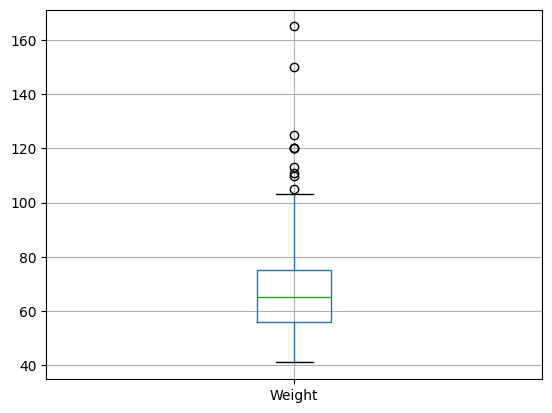

In [91]:
df.boxplot(column='Weight')
plt.show()

In [92]:
outliers = df[df['Weight'] > df['Weight'].quantile(0.75) + 1.5 * (df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25))]
outliers_df = pd.DataFrame(outliers)
df = df[df['Weight'] <= df['Weight'].quantile(0.75) + 1.5 * (df['Weight'].quantile(0.75) - df['Weight'].quantile(0.25))]

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

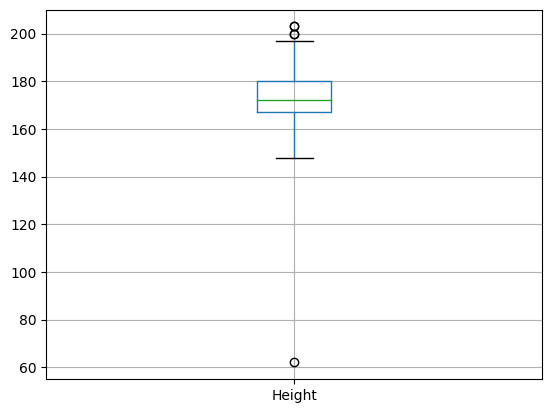

In [93]:
df.boxplot(column='Height')
plt.show()

In [95]:
outliersH = df[df['Height'] > df['Height'].quantile(0.75) + 1.5 * (df['Height'].quantile(0.75) - df['Height'].quantile(0.25))]
outliersHeight_df = pd.DataFrame(outliersH)
df = df[df['Height'] <= df['Height'].quantile(0.75) + 1.5 * (df['Height'].quantile(0.75) - df['Height'].quantile(0.25))]


9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

In [96]:
df['BMI'] = df['Height'] / (df['Weight']*100 ** 2)

10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

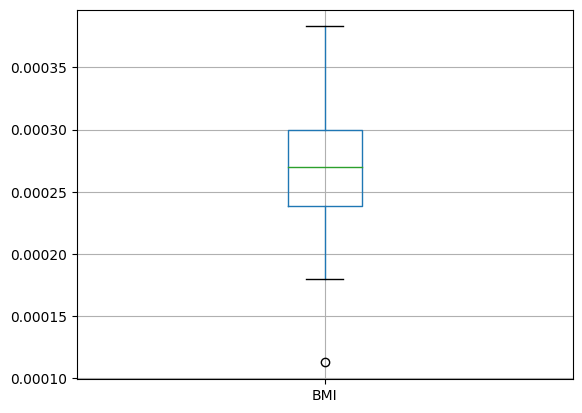

In [97]:
df.boxplot(column='BMI')
plt.show()

**Conclusiones**

Mis conclusiones de este ejercicio son las siguientes:

1.   La variable Weight, tiene un sesgo a la derecha, lo que se advierte porque la mayoría de las observaciones corresponden a pesos bajos y los outliers son personas de pesos extremadamente altos o extremadabamente bajos.

2.   valores faltantes por cada columna. En el caso de Weight son apenas 20. Por eso, se considera que es una buena opción imputar este valor perdido que es numérico, con la media.

3.   No encontré la forma de hacer las pruebas de independencias para los dos subconjuntos, aunque sí pude ver las dos gráficas de histograma. Esas gráficas dan una idea de que los valores faltantes sí se corresponden con la edad, de alguna manera.



